# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 4 submission</b></u>

### Roster Name: Kyle Louderback
### Student ID: 015331667
### Email address: kyle.louderback@sjsu.edu


##  <u>References and sources </u>

Yulia Newton code sample <br>
https://www.kaggle.com/code/butterednoodles/support-vector-machine-pca-tutorial-for-beginner/



##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score


%matplotlib inline
sns.set_style('whitegrid')

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### Code the solution

###Load Data

In [2]:
cancer = pd.read_csv('/content/gdrive/MyDrive/homework4_input_data.csv')
cancer.head()

,id,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,...,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL,Class
0,TCGA-AB-2828-03,3.935027,0.523329,0.0,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,...,8.972232,1.560704,0.000000,0.00000,0.0,11.189255,5.866117,0.000000,7.560923,Leukemia
1,TCGA-AB-2846-03,3.372801,0.000000,0.0,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,...,8.662337,2.509522,0.000000,0.00000,0.0,9.472547,6.514825,0.289298,8.023838,Leukemia
2,TCGA-AB-2870-03,4.198301,0.000000,0.0,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,...,8.848274,3.137405,0.185980,0.00000,0.0,9.710047,0.000000,0.000000,8.031553,Leukemia
3,TCGA-AB-2872-03,4.115014,0.000000,0.0,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,...,7.730065,3.087055,0.380857,0.23682,0.0,6.085074,6.012453,0.411678,5.186830,Leukemia
4,TCGA-AB-2881-03,3.662169,0.467823,0.0,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,...,8.414421,2.683150,0.176611,0.00000,0.0,8.203471,5.718898,0.000000,8.031553,Leukemia


In [3]:
X = cancer._get_numeric_data()
Y = cancer['Class']
X.head()
Y.head()

0    Leukemia
1    Leukemia
2    Leukemia
3    Leukemia
4    Leukemia
Name: Class, dtype: object

###PCA Plot

(4336, 2)


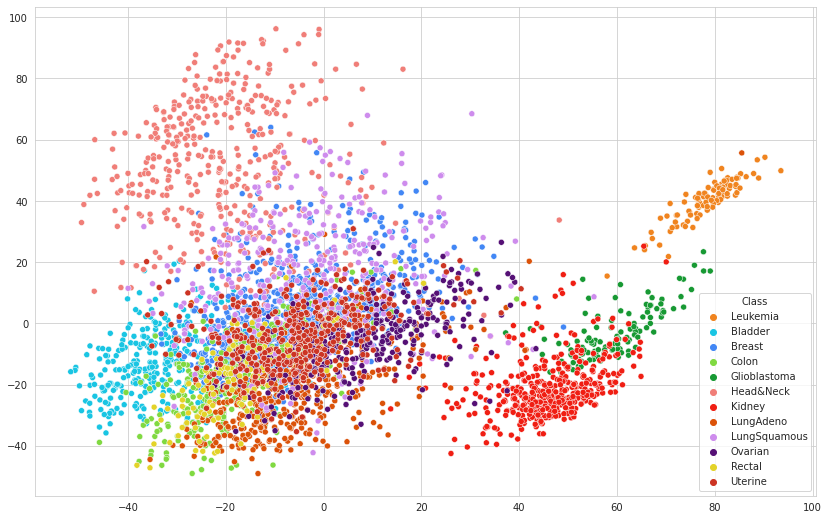

In [5]:
colors = {"Breast": '#4287f5',
 "Bladder": '#19c5e3',
 "Colon": '#80d941',
 "Glioblastoma": '#179933',
 "Head&Neck": '#f07e78',
 "Kidney": '#f01e13',
 "Leukemia": '#f0841f',
 "LungAdeno": '#db5209',
 "LungSquamous": '#ce8ced',
 "Ovarian": '#551075',
 "Rectal": '#e3d329',
 "Uterine": '#cc3423'}

pca = PCA(n_components=2)
pca_res = pca.fit_transform(X)

print(pca_res.shape)
fig = plt.gcf()


fig.set_size_inches(14, 9)

sns.scatterplot(x=pca_res[:,0],y=pca_res[:,1], hue=Y, palette=colors)

### Scaler / SVM


In [6]:
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=10, stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

model = LinearSVC(multi_class='ovr', class_weight='balanced')

model.fit(X_train,Y_train)

print('Accuracy of linear SVC on training set: {:.5f}'.format(model.score(X_train, Y_train)))

print('Accuracy of linear SVC on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of linear SVC on training set: 1.00000
Accuracy of linear SVC on test set: 0.97


### 5-Fold Cross

In [7]:
model_cross_val = LinearSVC(multi_class='ovr', class_weight='balanced')
cross_val_score(model_cross_val, X_rescaled, y=Y)

array([0.97465438, 0.96309112, 0.95963091, 0.95847751, 0.96539792])

### Confusion Matrices

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[ 66   0   0   0   0   0   0   0   0   0   0   0]
 [  0 173   0   1   0   0   0   0   1   0   0   0]
 [  0   0  72   0   0   0   0   0   0   0   2   0]
 [  0   0   0  23   0   0   0   0   0   0   0   0]
 [  0   0   0   0  83   0   0   0   0   0   0   0]
 [  0   0   0   0   0  84   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   0   0   0   0   0   0  83   1   1   0   0]
 [  0   0   0   0   0   0   0   4  74   0   0   0]
 [  0   0   0   0   0   0   0   0   0  68   0   0]
 [  0   0  14   0   0   0   0   0   0   0  12   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.01 0.   0.   0.   0.   0.01 0.   0.   0.  ]
 [0.   0.   0.97 0.   0.   0.   0.   0.   0.   0.   0.03 0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.

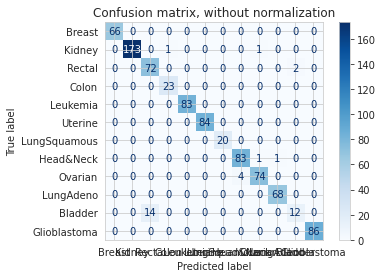

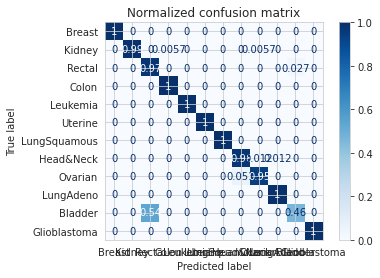

In [8]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=list(set(list(Y))),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()